In [19]:
from scipy import stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [20]:
def rename_cols_and_save(xls_name):
    df = pd.read_excel("../../data/{0}.xls".format(xls_name), index_col=None, header=None)
    if xls_name == 'hprice1':
        names_dict = {0:'price', 
                     1:'assess', 
                     2:'bdrms',
                     3:'lotsize', 
                     4:'sqrft', 
                     5:'colonial',
                     6:'lprice', 
                     7:'lassess', 
                     8:'llotsize',
                     9:'lsqrft', 
                    }
    df.rename(columns = names_dict, inplace = True)
    df.to_csv("../../data/{0}.csv".format(xls_name), index=False)
    return df

df = rename_cols_and_save(xls_name='hprice1')

## Estimating a Simple Regression Model

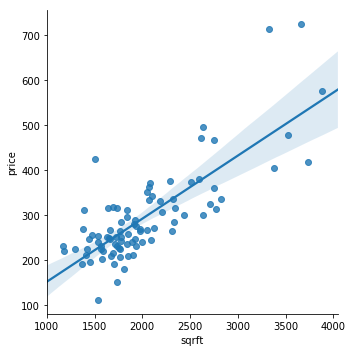

In [21]:
sns_plot = sns.lmplot(x="sqrft", y="price", data=df)
sns_plot.savefig("images/correlation_price_sqrft.png")

In [22]:
X = df["sqrft"]
X = sm.add_constant(X)
y = df["price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
df['predictions_linear'] = predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           8.42e-20
Time:                        21:30:02   Log-Likelihood:                -489.31
No. Observations:                  88   AIC:                             982.6
Df Residuals:                      86   BIC:                             987.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2041     24.743      0.453      0.652     -37.983      60.391
sqrft          0.1402      0.012     11.866      0.000       0.117       0.164
==============================================================================
Omnibus:                       26.343   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.311
Skew:                           1.185   Prob(JB):                     8.79e-11
Kurtosis:                       5.649   Cond. No.                     7.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting Predicted vs. Actual

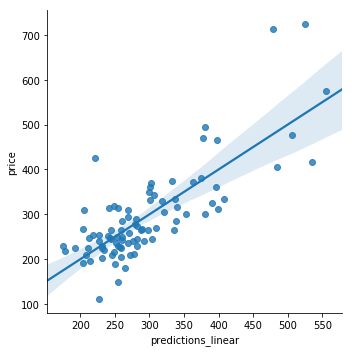

In [23]:
sns_plot = sns.lmplot(x="predictions_linear", y="price", data=df)
sns_plot.savefig("images/correlation_predictions_vs_actual.png")

### Using Diagnostic Residual Plots

#### Examining Linear Relationship

In [24]:
df['residual'] = df["price"] - df ["predictions_linear"]

In [25]:
def dist_plot(df, var, color):
    sns_plot = sns.distplot(df[var], color=color).get_figure()
    sns_plot.savefig("images/dist_plot_{0}.png".format(var))
    return None

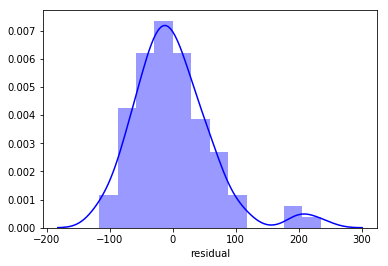

In [26]:
dist_plot(df=df, var='residual', color='b')

In [36]:
def normality_test(df, var):
    k2, p = stats.normaltest(df[var])
    alpha = 1e-3
    print("p = {:g}".format(p))
    print("null hypothesis: x comes from a normal distribution")
    if p < alpha: # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    return None




    

In [37]:
normality_test(df=df, var='residual')

p = 1.90403e-06
null hypothesis: x comes from a normal distribution
The null hypothesis can be rejected


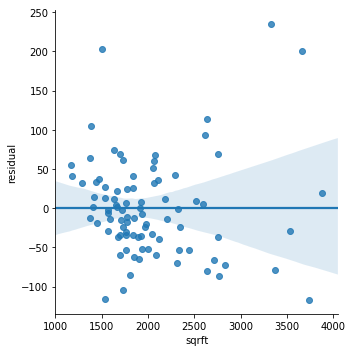

In [38]:
sns_plot = sns.lmplot(x="sqrft", y="residual", data=df)
sns_plot.savefig("images/correlation_sqrft_vs_residual.png")

#### Examining Quadratic Relationship

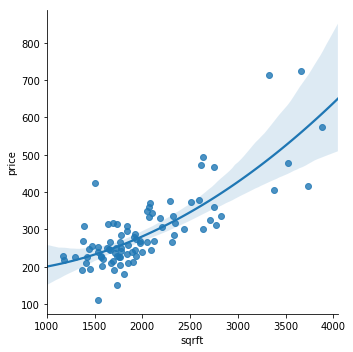

In [39]:
sns_plot = sns.lmplot(x="sqrft", y="price", data=df, order=2)
sns_plot.savefig("images/correlation_price_sqrft_squared.png")

In [40]:
df["squared_sqrft"] = df["sqrft"]**2
X = df["squared_sqrft"]
X = sm.add_constant(X)
y = df["price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
df['predictions_nonlinear_sqr'] = predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     153.3
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           8.27e-21
Time:                        21:32:34   Log-Likelihood:                -486.95
No. Observations:                  88   AIC:                             977.9
Df Residuals:                      86   BIC:                             982.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           165.6620     12.259     13.514      0.000     141.292     190.032
squared_sqrft  2.917e-05   2.36e-06     12.381      0.000    2.45e-05    3.39e-05
==============================================================================
Omnibus:                       20.527   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.224
Skew:                           0.954   Prob(JB):                     6.10e-08
Kurtosis:                       5.328   Cond. No.                     9.66e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
df['residual_nonlinear_sqr'] = df["price"] - df ["predictions_nonlinear_sqr"]

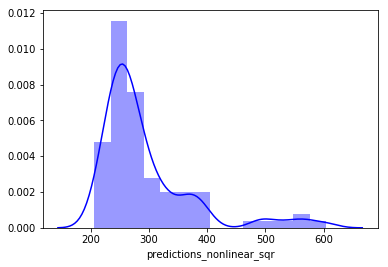

In [42]:
dist_plot(df=df, var='predictions_nonlinear_sqr', color='b')

In [43]:
normality_test(df=df, var='predictions_nonlinear_sqr')

p = 3.78194e-11
null hypothesis: x comes from a normal distribution
The null hypothesis can be rejected


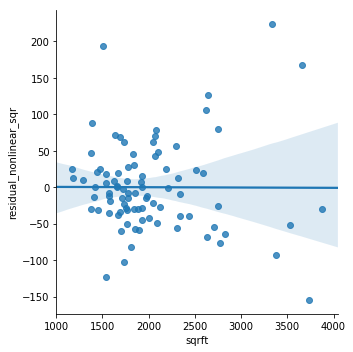

In [44]:
sns_plot = sns.lmplot(x="sqrft", y="residual_nonlinear_sqr", data=df)
sns_plot.savefig("images/correlation_sqrft_vs_residual_nonlinear_sqr.png")